In [35]:

#Importar librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Cargar los archivos traint y test
train_df = pd.read_csv('C:/Users/mldiazh/Documents/Aprendizaje/Practica1/mnist_train.csv')
test_df = pd.read_csv('C:/Users/mldiazh/Documents/Aprendizaje/Practica1/mnist_test.csv')

In [4]:
train_df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_df.shape

(60000, 785)

In [7]:
# Calculamos la característica de intensidad de píxeles para cada imagen y la agregamos como una nueva columna
train_df['intensidad_pixeles'] = train_df.sum(axis=1)
test_df['intensidad_pixeles'] = train_df.sum(axis=1)

# Mostramos el DataFrame con la nueva columna de intensidad de píxeles
print(train_df)
print(test_df)

       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x20  28x21  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   
59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x22  28x23  28x24  28x25  28x2

In [15]:
# Separar los datos en características (píxeles) y etiquetas
X_train = train_df.drop('label', axis=1)  # Características (píxeles)
y_train = train_df['label']  # Etiquetas
X_test = test_df.drop('label', axis=1)  # Características (píxeles)
y_test = test_df['label']  # Etiquetas

# Mostrar las formas de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (60000, 785)
Forma de X_test: (10000, 785)
Forma de y_train: (60000,)
Forma de y_test: (10000,)


In [27]:
# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Estandarizar los conjuntos de entrenamiento y prueba
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# Entrenar un clasificador (ejemplo: clasificador de bosque aleatorio)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de características de prueba
y_pred = clf.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud: {accuracy}')

Exactitud: 0.9693


In [30]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 969    0    1    0    0    2    4    1    3    0]
 [   0 1124    3    2    0    2    2    1    1    0]
 [   5    0 1004    3    4    0    3    7    5    1]
 [   0    0   10  972    0    8    0    9    9    2]
 [   1    0    2    0  951    0    4    0    3   21]
 [   3    1    1   14    3  856    5    2    5    2]
 [   5    3    2    0    2    5  936    0    5    0]
 [   2    3   22    2    1    0    0  987    2    9]
 [   4    0    6    7    3    6    4    4  933    7]
 [   6    5    2    9   13    2    1    6    4  961]]


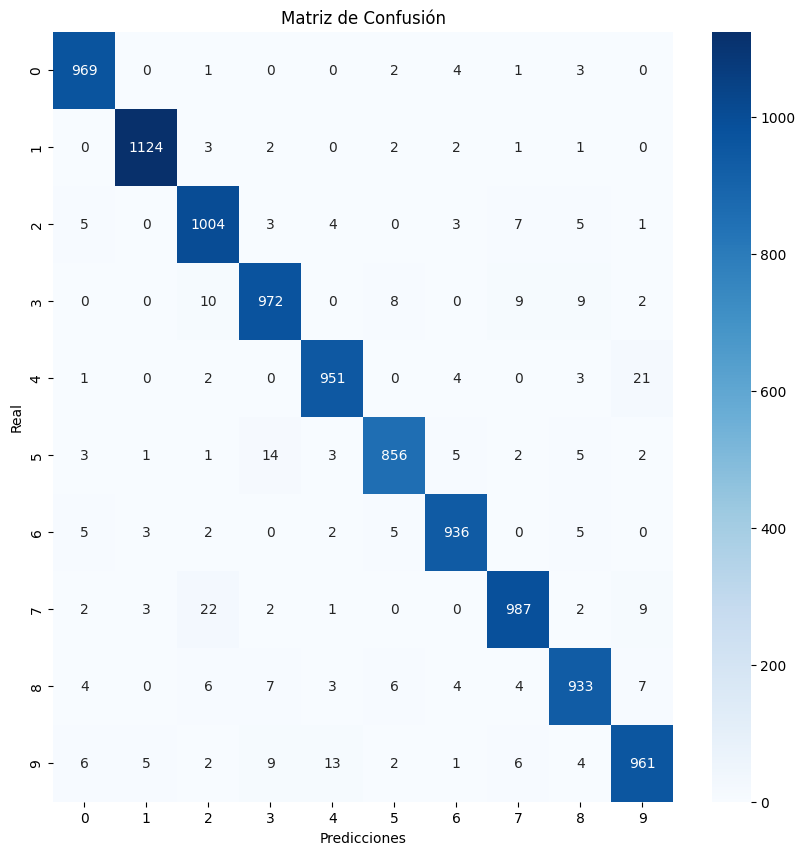

In [36]:
# Visualizar la matriz de confusión
plt.figure(figsize=(10, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicciones")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()